# First Deep Learning Project in Python with Keras

The steps we are going to cover:
1. Dependancies installation
2. Load Data.
3. Define Keras Model.
4. Compile Keras Model.
5. Fit Keras Model.
6. Evaluate Keras Model.
7. Put It All Together.
8. Make Predictions

## Dependancies installation

In [1]:
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    # Installer toutes les librairies nécessaires
    !pip install tensorflow numpy pandas scikit-learn matplotlib seaborn
else:
    print("""In the environment you created for this module, install the required dependencies.
For example:
    conda create --name ML5 python=3.11
    conda activate ML5
    conda install jupyter tensorflow numpy pandas scikit-learn matplotlib seaborn""")


In the environment you created for this module, install the required dependencies.
For example:
    conda create --name ML5 python=3.11
    conda activate ML5
    conda install jupyter tensorflow numpy pandas scikit-learn matplotlib seaborn


## Load Data
    

In [2]:
if IN_COLAB:
  from google.colab import files
  uploaded = files.upload()

Download the dataset and place it in your local working directory, the same location as your python file. Take a look at the dataset:

In [3]:
import pandas as pd
df = pd.read_csv('../data/housepricedata.csv')

Here, you can explore the data a little. We have our input features in the first ten columns:

- Lot Area (in sq ft)
- Overall Quality (scale from 1 to 10)
- Overall Condition (scale from 1 to 10)
- Total Basement Area (in sq ft)
- Number of Full Bathrooms
- Number of Half Bathrooms
- Number of Bedrooms above ground
- Total Number of Rooms above ground
- Number of Fireplaces
- Garage Area (in sq ft)

In our last column, we have the feature that we would like to predict:
- Is the house price above the median or not? (1 for yes and 0 for no)

Which task are we going to train the neural network for (regression, classification, other...) ?

In [4]:
# Your answer here : 
num_col = list(df.columns)[:-1]
display(df[num_col].describe())
col_target =  list(df.columns)[-1]
display(df[col_target].describe())


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,1057.429452,1.565068,0.382877,2.866438,6.517808,0.613014,472.980137
std,9981.264932,1.382997,1.112799,438.705324,0.550916,0.502885,0.815778,1.625393,0.644666,213.804841
min,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,7553.500000,5.000000,5.000000,795.750000,1.000000,0.000000,2.000000,5.000000,0.000000,334.500000
50%,9478.500000,6.000000,5.000000,991.500000,2.000000,0.000000,3.000000,6.000000,1.000000,480.000000
75%,11601.500000,7.000000,6.000000,1298.250000,2.000000,1.000000,3.000000,7.000000,1.000000,576.000000
max,215245.000000,10.000000,9.000000,6110.000000,3.000000,2.000000,8.000000,14.000000,3.000000,1418.000000


count    1460.000000
mean        0.498630
std         0.500169
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: AboveMedianPrice, dtype: float64

This is a classicfication problem:   
given a set of features, is the house above the median price ?

Now that we’ve seen what our data looks like, we want to convert it into arrays for our machine to process:

In [5]:
dataset = df.values

Split the dataset into input features (X) and the feature we wish to predict (Y). To do that split, assign the first 10 columns of our array to a variable called X and the last column of our array to a variable called Y

In [6]:
X = dataset[:,0:10]
y = dataset[:,10]

Now, we want to split our dataset into a training set, a validation set and a test set. These are the dimensions you need to get for your train, validation and test datasets: (1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)

We will use the code from scikit-learn called ‘train_test_split’, which as the name suggests, split our dataset into a training set and a test set. We first import the code we need:

In [7]:
# splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_vt, y_train, y_vt = train_test_split(X,y,test_size=0.3,random_state=42)

Unfortunately, this function only helps us split our dataset into two. Since we want a separate validation set and test set, we can use the same function to do the split again on val_and_test:

In [8]:
# splitting into validation and test
X_valid, X_test, y_valid, y_test = train_test_split(X_vt,y_vt,test_size=0.5,random_state=42)

Feature scaling will help us see all the variables from the same scale, it will also help our models learn faster

In [9]:
# scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True,with_std=True)
X_train_scaled = ss.fit_transform(X_train)
X_valid_scaled = ss.transform(X_valid)
X_test_scaled = ss.transform(X_test)


In [10]:
pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4,5,6,7,8,9
count,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03
mean,9.125121e-17,7.300097e-17,6.778661e-17,8.169156e-17,-1.877168e-16,1.564306e-17,-1.738118e-17,2.711464e-16,-2.085742e-17,-5.561978e-17
std,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00
min,-8.340925e-01,-3.741231e+00,-4.112182e+00,-2.369762e+00,-2.907723e+00,-7.585170e-01,-3.565242e+00,-2.789337e+00,-9.432625e-01,-2.290090e+00
25%,-2.809192e-01,-8.230565e-01,-5.086236e-01,-5.920515e-01,-1.069941e+00,-7.585170e-01,-1.098297e+00,-9.481944e-01,-9.432625e-01,-6.077545e-01
50%,-1.011494e-01,-9.351293e-02,-5.086236e-01,-1.448288e-01,7.678403e-01,-7.585170e-01,1.351750e-01,-3.344802e-01,5.942403e-01,3.302105e-02
75%,8.363168e-02,6.360307e-01,3.922660e-01,5.237691e-01,7.678403e-01,1.265515e+00,1.351750e-01,2.792340e-01,5.942403e-01,4.746042e-01
max,1.805862e+01,2.824662e+00,3.094935e+00,1.129289e+01,2.605622e+00,3.289548e+00,6.302536e+00,4.575233e+00,3.669246e+00,4.516050e+00


## Define Keras Model.

The first thing we have to do is to set up the architecture. Let’s first think about what kind of neural network architecture we want. Suppose we want this neural network:
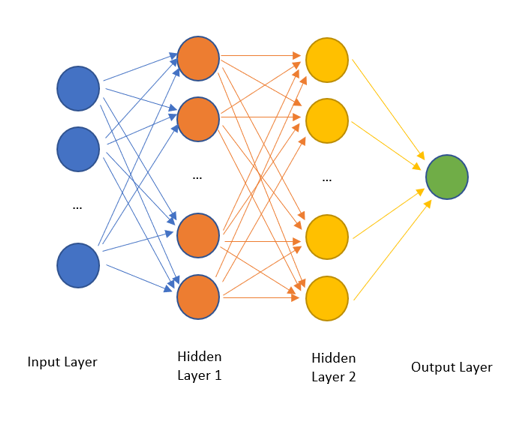  
In words, we want to have these layers:

- Hidden layer 1: 12 neurons, ReLU activation
- Hidden layer 2: 16 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation
    
Now, we need to describe this architecture to Keras. We will be using the Sequential model, which means that we merely need to describe the layers above in sequence.

In [11]:
# Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


# define model
# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(10,), activation='relu'))
model.add(Dense(16,input_shape=(12,), activation='relu'))
model.add(Dense(1, input_shape=(16,),activation='sigmoid'))

2025-07-24 14:31:12.133310: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/thomas/anaconda3/envs/ml5/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Now that the model is defined, we can compile it.

Compiling the model uses TensorFlow that chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed.

In [12]:
# compile model
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

We have defined our model and compiled it ready for efficient computation.

Now it is time to execute the model on some data (use 100 iterations and 32 batch size).

In [13]:
# train model
history = model.fit(X_train_scaled,y_train, epochs=150, batch_size=10)


Epoch 1/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.8294 - loss: 0.1736
Epoch 2/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - accuracy: 0.8154 - loss: 0.1546
Epoch 3/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - accuracy: 0.8253 - loss: 0.1386
Epoch 4/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.8450 - loss: 0.1245
Epoch 5/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.8289 - loss: 0.1230
Epoch 6/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.8404 - loss: 0.1130
Epoch 7/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.8247 - loss: 0.1196
Epoch 8/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - accuracy: 0.8575 - loss: 0.1056
Epoch 9/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - accuracy: 0.8423 - loss: 0.1030
Epoch 10/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.8584 - loss: 0.1014
Epoch 11/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.8620 - loss: 0.0964
Epoch 12/150
103/10

In [14]:
from sklearn.metrics import accuracy_score
# predict on validation set
y_valid_pred = model.predict(X_valid_scaled)
y_valid_pred_rounded = [round(x[0]) for x in y_valid_pred]
# calculate accuracy on validation set
accuracy_score(y_valid,y_valid_pred_rounded)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


0.9315068493150684

We have trained our model, which gives us a correct accuracy. But we haven't used our validation set properly, and our test set at all. Let's correct that.

In [15]:
# train model
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']

In [16]:
# predict on TEST set
y_test_pred = model.predict(X_test_scaled)
y_test_pred_rounded = [round(x[0]) for x in y_test_pred]
# calculate accuracy on test set
accuracy_score(y_test,y_test_pred_rounded)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


0.91324200913242

Visualize training and validation losses and accuracies plots with the help of keras

Text(0.5, 0, 'epochs')

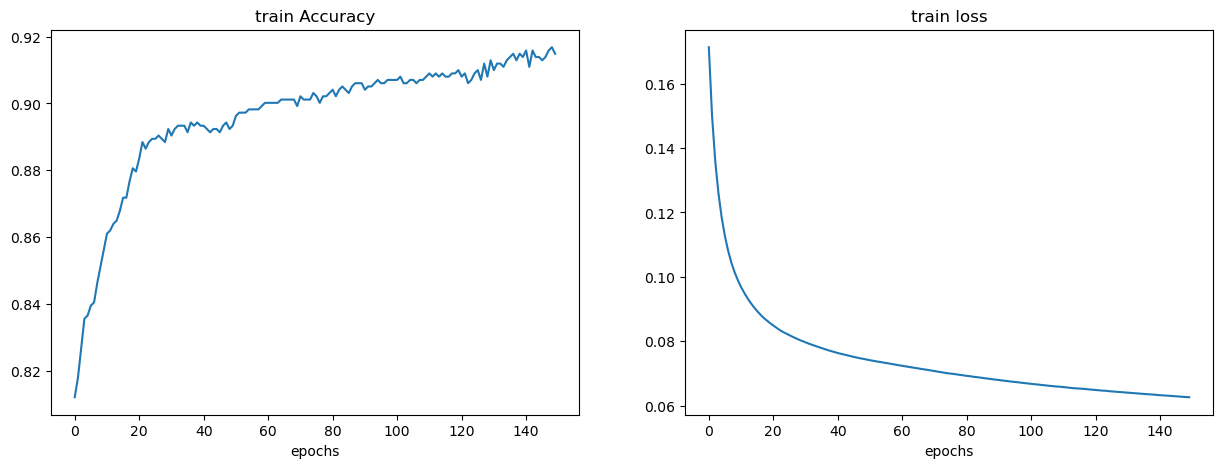

In [19]:
# visualize training and validation accuracies
import matplotlib.pyplot as plt
# train_accuracy
# train_loss 
# visualize training and validation losses
plt.figure(figsize=(15,5))
ax0,ax1=plt.subplot(1,2,1),plt.subplot(1,2,2)
ax0.plot(train_accuracy)
ax0.set_title('train Accuracy')
ax0.set_xlabel('epochs')
ax1.plot(train_loss)
ax1.set_title('train loss')
ax1.set_xlabel('epochs')



We have trained our neural network on the entire dataset and we can evaluate the performance of the network on the same dataset. A list of most hyperparameters available keras: 

https://keras.io/api/layers/initializers/

https://keras.io/api/layers/activations/

https://keras.io/api/losses/

https://keras.io/api/optimizers/